# 1) Chargement des données

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('winequality-white.csv',sep=';')
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [2]:
datafun=data.drop(['chlorides'], axis=1)
datafun.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 2) Exploration des données

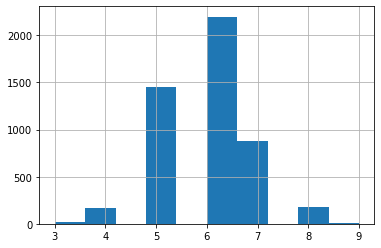

In [3]:
data['quality'].hist()

In [4]:
nb6=data[data['quality']==6]
nb6.shape[0]/data.shape[0]


0.44875459371171905

# 3) Construction et évaluation de modèles

In [5]:
import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#classification multiclasses

data=pd.read_csv('winequality-white.csv',sep=';')


train_set, test_set=train_test_split(data,test_size=0.2,random_state=42)
x_train=train_set.drop(['quality'], axis=1)
y_train= train_set['quality'].copy()
x_test=test_set.drop(['quality'], axis=1)
y_test= test_set['quality'].copy()
scaler=StandardScaler()
x_test_prep=scaler.fit_transform(x_test)
x_train_prep=scaler.fit_transform(x_train)

clf_rdmf=RandomForestClassifier(random_state=42)
clf2=OneVsRestClassifier(SVC(gamma='auto'))
clf3= LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
clf4=LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)






In [6]:
clf_score = cross_val_score(clf_rdmf, x_train_prep, y_train, cv=4)
clf_score, np.mean(clf_score)

C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([0.62729124, 0.60652396, 0.63292434, 0.61617195]), 0.6207278719632082)

In [7]:
clf2_score = cross_val_score(clf2, x_train_prep, y_train, cv=4)
clf2_score , np.mean(clf2_score)

(array([0.55498982, 0.54740061, 0.58691207, 0.56601842]), 0.5638302293768102)

In [8]:
clf3_score = cross_val_score(clf3, x_train_prep, y_train, cv=4)
clf3_score, np.mean(clf3_score)

(array([0.53462322, 0.53720693, 0.56134969, 0.53940635]), 0.5431465472083741)

In [9]:
clf4_score = cross_val_score(clf4, x_train_prep, y_train, cv=4)
clf4_score, np.mean(clf4_score)

C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(array([0.54276986, 0.54332314, 0.5593047 , 0.5383828 ]), 0.5459451262668221)

C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


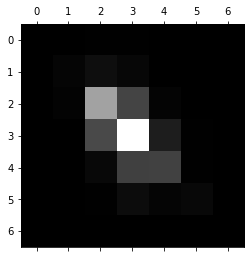

In [10]:
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(clf_rdmf, x_train_prep, y_train, cv=4)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)

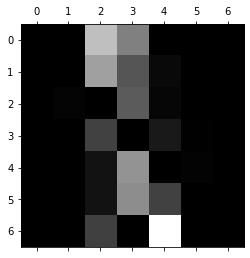

In [11]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# 4) On repose le problème en une classification binaire

In [12]:
#classification binaire

y_test =y_test.values
y_train=y_train.values



In [13]:
y_test= np.where(y_test<6,0,1)
y_train = np.where(y_train<6, 0, 1)

In [14]:

from sklearn import svm
clf_bi = svm.SVC(kernel='rbf', gamma=0.01)


clf_bi.fit(x_train_prep, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
clf_rdmf.fit(x_train_prep,y_train)

C:\Users\LeLimier\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

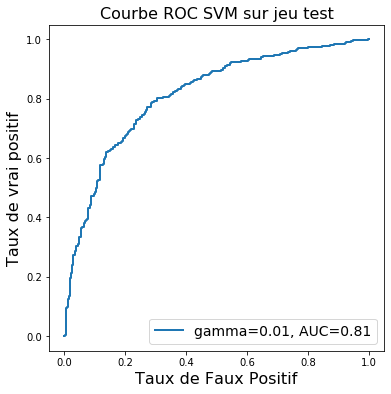

In [19]:

y_pred = clf_bi.decision_function(x_test_prep)


from sklearn import metrics
TFP, TVP, thr = metrics.roc_curve(y_test, y_pred)

auc = metrics.auc(TFP, TVP)


from matplotlib import pyplot as plt
#on trace la courbe ROC
fig = plt.figure(figsize=(6, 6))


plt.plot(TFP, TVP, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.xlabel('Taux de Faux Positif', fontsize=16)
plt.ylabel('Taux de vrai positif', fontsize=16)
plt.title('Courbe ROC SVM sur jeu test', fontsize=16)
plt.legend(loc="lower right", fontsize=14)





In [20]:
from sklearn import model_selection
#échelle logarithmique pour définir plusieurs valeurs de puissance de 10 pour nos hyperparamêtre
C_ech = np.logspace(-2, 3, 6)

gamma_ech = np.logspace(-2, 2, 5)


param_grid = {'C': C_ech, 'gamma': gamma_ech}



grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=4,  
                                    scoring='roc_auc')


grid.fit(x_train_prep, y_train)


grid.best_params_, grid.best_score_

({'C': 1.0, 'gamma': 1.0}, 0.8528275741618471)

In [27]:
svm_final=grid.best_estimator_.fit(x_train_prep,y_train)

In [28]:
y_pred = svm_final.decision_function(x_test_prep)

TFP_cv, TVP_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

auc_final = metrics.auc(TFP, TVP)
auc_final

0.8125168408662233

# 5) Visualisation des données avec ACP

In [29]:
from sklearn.decomposition import PCA
#on réalise une acp sur 2 axes
pca=PCA(n_components=2)
new_data=data.drop(['quality'], axis=1)
new_data=pca.fit_transform(new_data)
new_data = pd.DataFrame(new_data)
new_data = pd.concat([new_data, data['quality']], axis=1)
#type(new_data)
#type(data['quality'])
np.sum(pca.explained_variance_ratio_)

0.988991207090898

In [32]:
train_set2, test_set2=train_test_split(new_data,test_size=0.2)
x_train2=train_set2.drop(['quality'], axis=1)
y_train2= train_set2['quality'].copy()
x_test2=test_set2.drop(['quality'], axis=1)
y_test2= test_set2['quality'].copy()

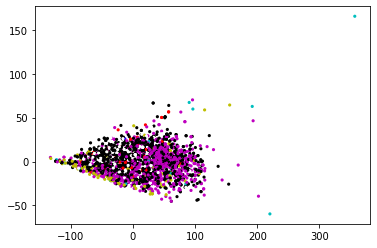

In [33]:
cmp = np.array(['r','g','b','c','y','m','k','w','r','b'])
plt.figure()
#nuage de point de notre jeu de données
plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=cmp[new_data.iloc[:,2]], s=10, edgecolors='none')

In [34]:
new_data2=new_data[new_data[0]>0].groupby(['quality'])
new_data2.count()

,0,1
quality,,
3,11,11
4,61,61
5,889,889
6,997,997
7,281,281
8,59,59


In [35]:
new_data3=new_data[new_data[0]<0].groupby(['quality'])
new_data3.count()

,0,1
quality,,
3,9,9
4,102,102
5,568,568
6,1201,1201
7,599,599
8,116,116
9,5,5


In [36]:
new_data3=new_data[new_data[1]<0].groupby(['quality'])
new_data3.count()

,0,1
quality,,
3,12,12
4,126,126
5,847,847
6,1051,1051
7,356,356
8,63,63
9,2,2


In [37]:
new_data3=new_data[new_data[1]>0].groupby(['quality'])
new_data3.count()

,0,1
quality,,
3,8,8
4,37,37
5,610,610
6,1147,1147
7,524,524
8,112,112
9,3,3


In [38]:
new_data_test5=new_data[new_data['quality']<5 ]
new_data_test6=new_data[new_data['quality']>6 ]
new_data = pd.concat([new_data_test5,new_data_test6], axis=0)
new_data

,0,1,quality
46,72.360260,8.913977,4
98,-61.354492,-15.625461,4
115,-41.457514,-17.119451,4
147,-45.222216,-8.747833,4
172,-45.447621,-20.208621,4
...,...,...,...
4870,-7.785763,-4.398086,7
4876,-21.129868,4.305012,7
4886,-14.249130,13.917046,7
4887,-87.565516,-7.643976,7


# 6) Visualisation des vins excellents avec ACP

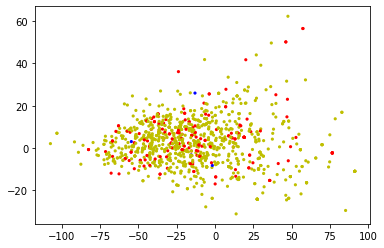

In [39]:
cmp = np.array(['r','y','b','c','y','m','w','y','r','b'])
plt.figure()
#nuage de point pour les notes>6
plt.scatter(new_data_test6.iloc[:,0],new_data_test6.iloc[:,1], c=cmp[new_data_test6.iloc[:,2]], s=10, edgecolors='none')